## Laboratorio di Simulazione Numerica 

# ESERCITAZIONE 6 #

### esercizio 6.1

In questa esercitazione abbiamo simulato un modello di Ising monodimensionale, modello per cui è presente una soluzione analitica. Il sistema preso in considerazione è un sistema composto da $N$ spin la cui interazione con i vicini più prossimi è descritta dalla Hamiltoniana seguente:

$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

dove le seguenti costanti avranno valore fissato $\mu_B=1$ e $k_B=1$ e $\{ s_i \}_{i=1,N}$ sono variabili di spin che prendono valori da $\{-1;1\}$, $J>0$ (in base al modello ferromagnetico)


Per la simulazione è stato campionato il peso di Boltzmann tramite implementazione di due diversi algoritmi:
* l'Algoritmo di Metropolis; 
* l'Algoritmo di Gibbs.

Nel codice è stata anche aggiunta la possibilità di restart da configurazione finale e il codice per il calcolo delle seguenti grandezze in funzione di $T$ nel range $\left[0.5;2.0\right]$ per un sistema di $N=50$ spin con $J=1$:
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$


La prima cosa necessaria alla simulazione è l'equilibrazione del sistema. Infatti quest'ultimo parte da una configurazione con valori degli spin determinati randomicamente, ed è quindi compatibile con una temperatura $T=\infty$ mentre $T$ deve essere nel range $\left[0.5;2.0\right]$. All'inizio della simulazione il sistema dovrà  quindi prima assestarsi in modo tale che la configurazione rispetti la temperatura richiesta.

Seguono le simulazioni per l'equilibrazione in funzione degli step per la temperatura 0.5 ottenuta con entrambi gli algoritmi.

EQUILIBRAZIONE Metropolis

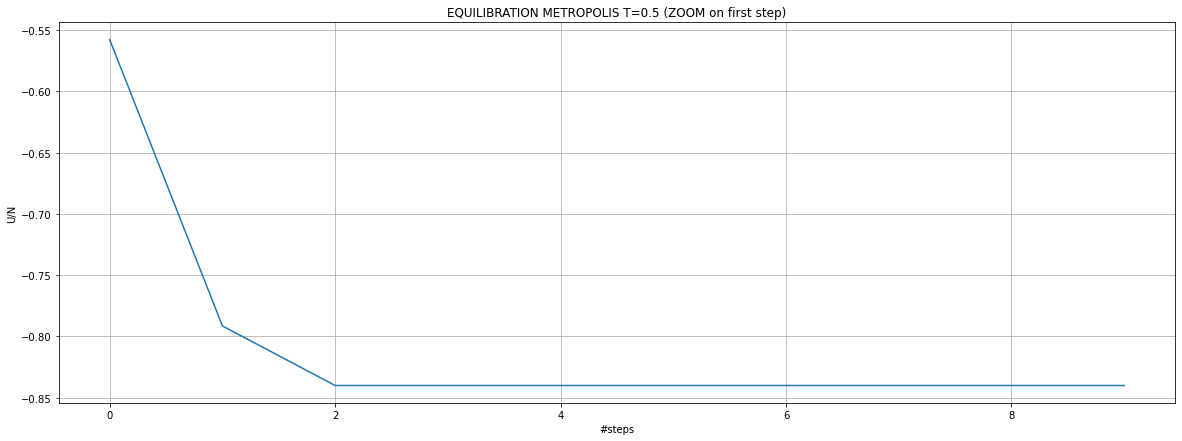

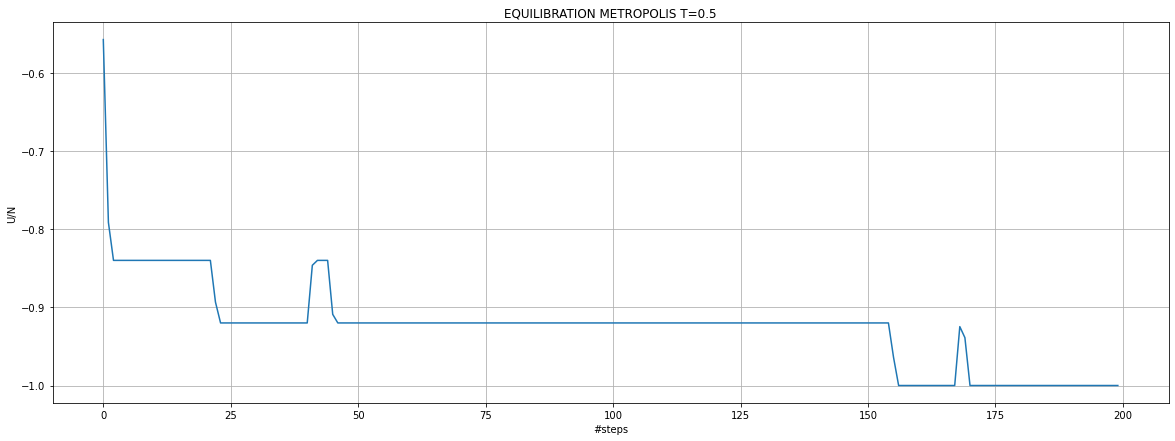

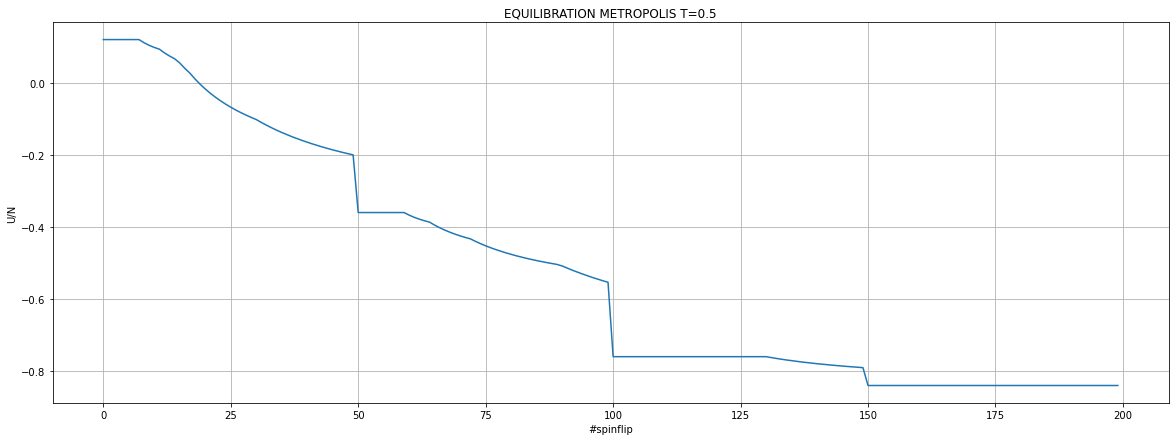

In [27]:
import matplotlib.pyplot as plt
import numpy as np

f = np.loadtxt("ENE_M.0", usecols=1, unpack='true')
x = np.arange(f.size)
plt.figure(figsize=(20,7))
plt.errorbar(x[0:10],f[0:10])
plt.title('EQUILIBRATION METROPOLIS T=0.5 (ZOOM on first step)')
plt.xlabel('#steps')
plt.ylabel('U/N')
#[0:2000]
#plt.plot([0,10000],[1.1,1.1], color="red")
plt.grid(True)
plt.show()

f = np.loadtxt("ENE_M.0", usecols=1, unpack='true')
x = np.arange(f.size)
plt.figure(figsize=(20,7))
plt.errorbar(x[0:200],f[0:200])
plt.title('EQUILIBRATION METROPOLIS T=0.5')
plt.xlabel('#steps')
plt.ylabel('U/N')
#[0:2000]
#plt.plot([0,10000],[1.1,1.1], color="red")
plt.grid(True)
plt.show()

f = np.loadtxt("ENE_M_FLIP.0", usecols=1, unpack='true')
x = np.arange(f.size)
plt.figure(figsize=(20,7))
plt.errorbar(x[0:200],f[0:200])
plt.title('EQUILIBRATION METROPOLIS T=0.5')
plt.xlabel('#spinflip')
plt.ylabel('U/N')
#[0:2000]
#plt.plot([0,10000],[1.1,1.1], color="red")
plt.grid(True)
plt.show()






Si può notare come già dopo circa 175 step l'U/N del sistema risulti pressoché costante, ma già dopo qualche step (già dopo 2 step) il sistema risulta vicino al suo stato finale e in meno di 25 step risulta ben equilibrato con oscillazioni di ampiezza costante attorno al valore ottenuto, sebbene possa sembrare strana un'equilibrazione di così pochi passi è utile ricordare che ogni passo è composto da 50 spinflip che approssimativamente agiscono su ogni spin. Per questo motivo per una migliore visualizzazione del tempo di equilibrazione è sopra riportato un secondo grafico non in funzione degli step ma in funzione dei singoli spinflip.

EQUILIBRAZIONE Gibbs

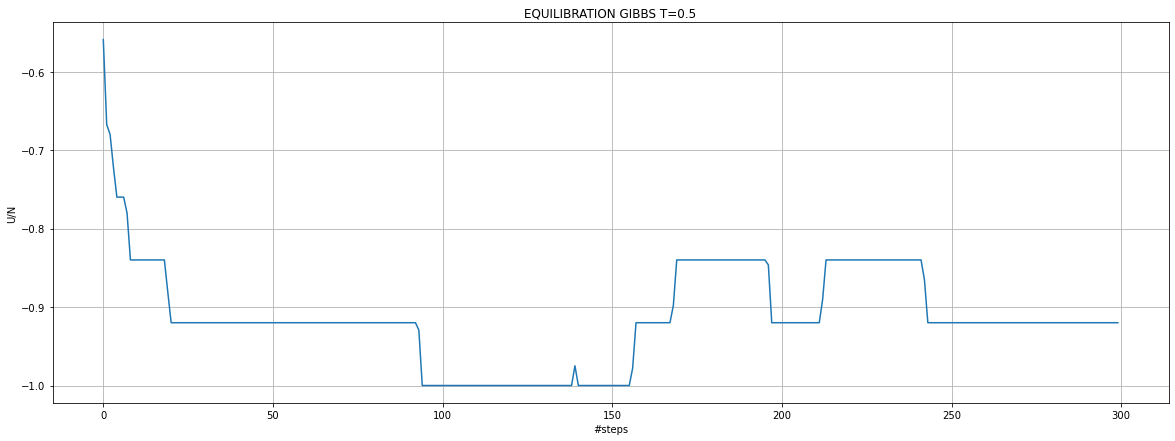

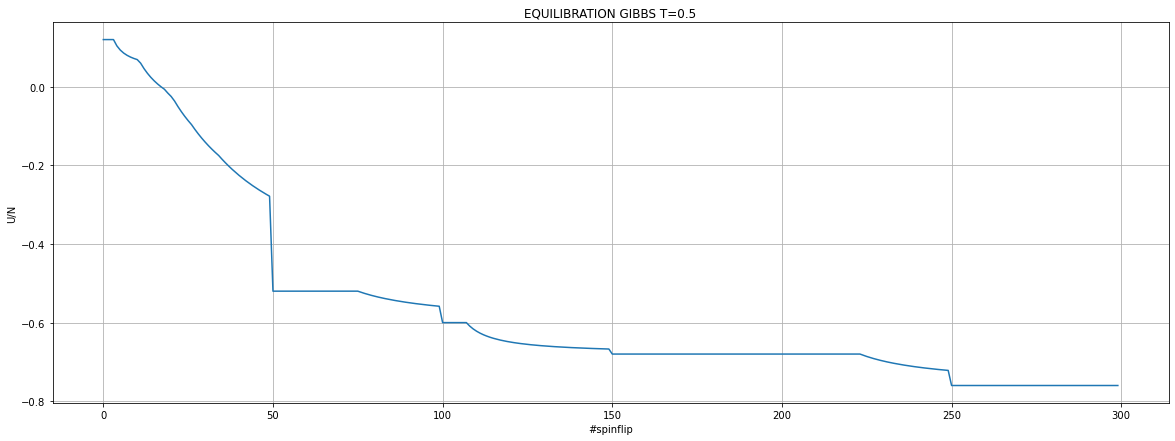

In [21]:
import matplotlib.pyplot as plt
import numpy as np

f = np.loadtxt("ENE_G.0", usecols=1, unpack='true')
x = np.arange(f.size)
plt.figure(figsize=(20,7))
plt.errorbar(x[0:300],f[0:300])
plt.title('EQUILIBRATION GIBBS T=0.5')
plt.xlabel('#steps')
plt.ylabel('U/N')
#[0:2000]
#plt.plot([0,10000],[1.1,1.1], color="red")
plt.grid(True)
plt.show()

f = np.loadtxt("ENE_G_FLIP.0", usecols=1, unpack='true')
x = np.arange(f.size)
plt.figure(figsize=(20,7))
plt.errorbar(x[0:300],f[0:300])
plt.title('EQUILIBRATION GIBBS T=0.5')
plt.xlabel('#spinflip')
plt.ylabel('U/N')
#[0:2000]
#plt.plot([0,10000],[1.1,1.1], color="red")
plt.grid(True)
plt.show()

anche in questo caso valgono le considerazioni precedenti

Dopo aver trovato il tempo di equilibrazione per la temperatura 0.5 è stata sfruttata la ripartenza da configurazione precedente per stimare un modo più efficace di equilibrare il sistema, dovendolo fare per ogni temperatura con l'utilizzo di un solo codice. Infatti, come mostrato nel seguente grafico, si può notare che sfruttando la ripartenza da una temperatura non più infinita ma prossima a quella desiderata (T di partenza=0.5, T desiderata=0.65) il tempo di equilibrazione è molto minore (pressoché nullo, come valore si prende 50 step) di quello trovato per la prima temperatura.

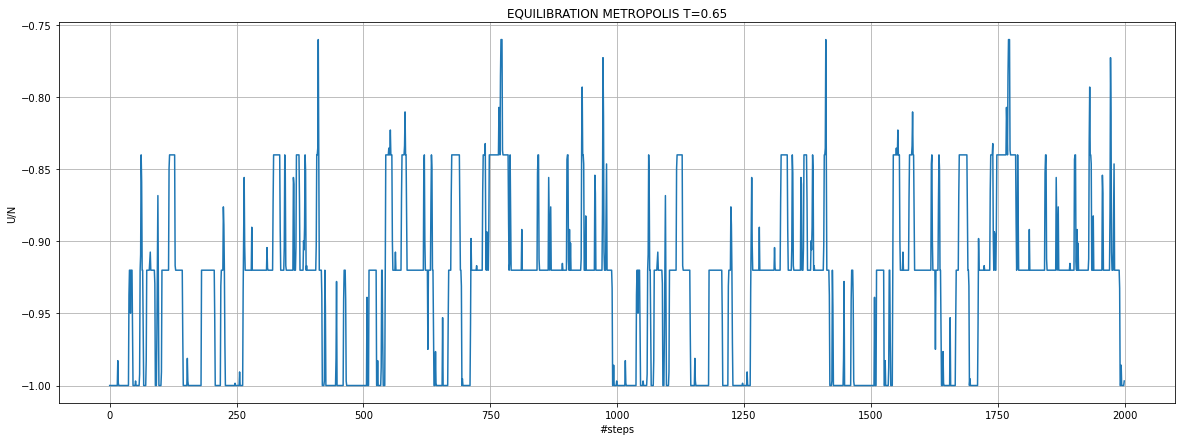

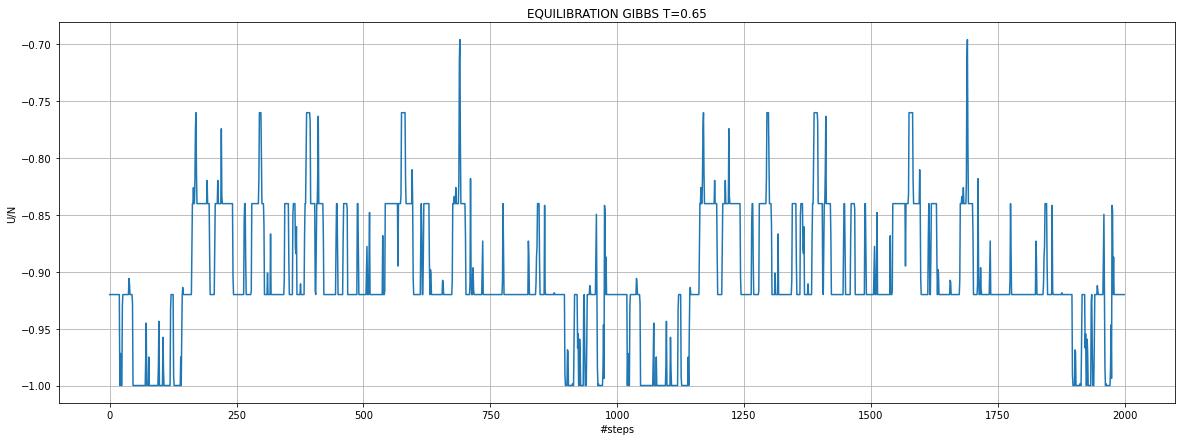

In [31]:
import matplotlib.pyplot as plt
import numpy as np

f = np.loadtxt("EQU_TEMP_M.0", usecols=1, unpack='true')
x = np.arange(f.size)
plt.figure(figsize=(20,7))
plt.errorbar(x,f)
plt.title('EQUILIBRATION METROPOLIS T=0.65')
plt.xlabel('#steps')
plt.ylabel('U/N')
#[0:2000]
#plt.plot([0,10000],[1.1,1.1], color="red")
plt.grid(True)
plt.show()

f = np.loadtxt("EQU_TEMP_G.0", usecols=1, unpack='true')
x = np.arange(f.size)
plt.figure(figsize=(20,7))
plt.errorbar(x,f)
plt.title('EQUILIBRATION GIBBS T=0.65')
plt.xlabel('#steps')
plt.ylabel('U/N')
#[0:2000]
#plt.plot([0,10000],[1.1,1.1], color="red")
plt.grid(True)
plt.show()

E' stato quindi implementato un unico codice per tutte le temperature che sfrutta questo fenomeno e restituisce in output i dati di ogni grandezza in funzione della temperatura.

Di seguito sono riportati i grafici dei valori ottenuti (in blu), confrontati con le soluzioni analitiche (in rosso)

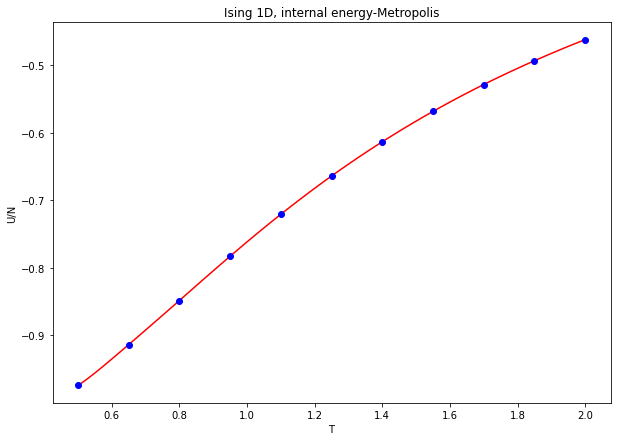

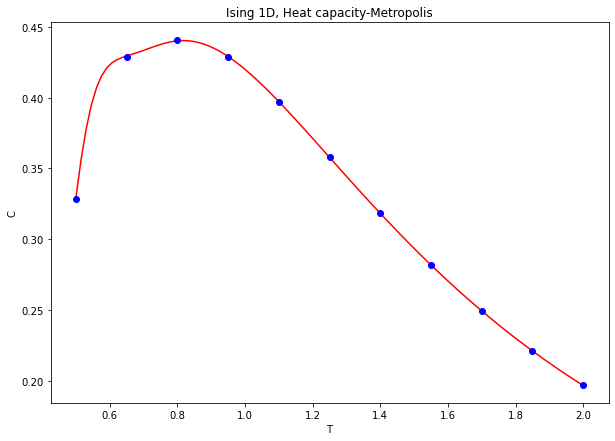

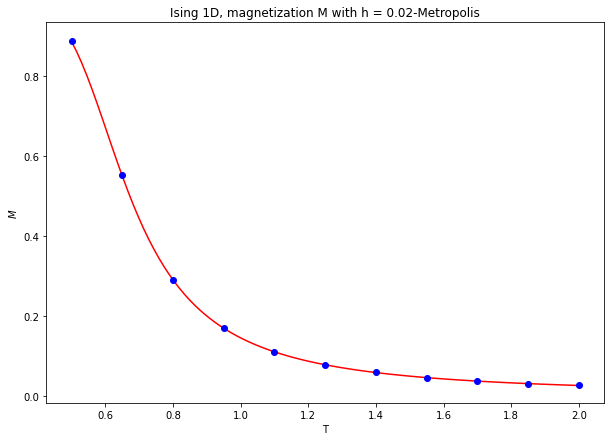

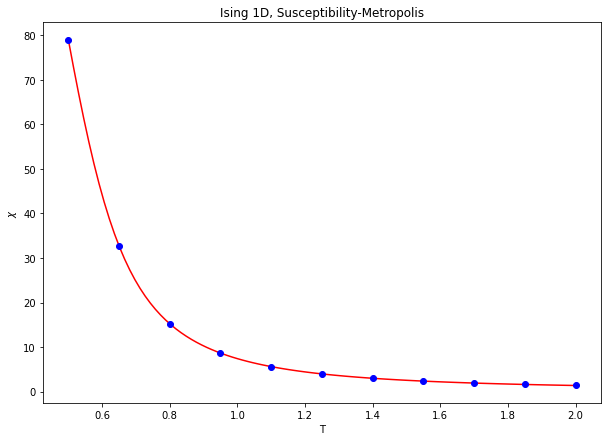

In [40]:
#METROPOLIS


import numpy as np
import matplotlib.pyplot as plt


points=100
T = np.linspace(0.5,2.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
#ENERGIA INTERNA
x,f,error=np.loadtxt("output.FINAL_0_Metro", usecols=(0,1,2), unpack='true')
plt.figure(figsize=(10,7))
plt.plot(T, e,color='red')
plt.errorbar(x,f,error, fmt='o', color='blue')
plt.title('Ising 1D, internal energy-Metropolis')
plt.xlabel('T')
plt.ylabel('U/N')
plt.show()

#CAPACITA TERMICA
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
plt.figure(figsize=(10,7))
x,f,error=np.loadtxt("output.FINAL_0_Metro", usecols=(0,3,4), unpack='true')
plt.errorbar(x,f,error, fmt='o', color='blue')
plt.plot(T, heat,color='red')
plt.title('Ising 1D, Heat capacity-Metropolis')
plt.xlabel('T')
plt.ylabel('C')
plt.show()

#MAGNETIZZAZIONE
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
plt.figure(figsize=(10,7))
x,f,error=np.loadtxt("output.FINAL_0_02_Metro", usecols=(0,5,6), unpack='true')
#output.FINAL_0_02_Metro
plt.errorbar(x,f,error, fmt='o', color='blue')
plt.plot(T, M,color='red')
plt.title('Ising 1D, magnetization M with h = 0.02-Metropolis')
plt.xlabel('T')
plt.ylabel('$M$')
plt.show()

#SUSCETTIBILITA
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
plt.figure(figsize=(10,7))
x,f,error=np.loadtxt("output.FINAL_0_Metro", usecols=(0,7,8), unpack='true')
plt.errorbar(x,f,error, fmt='o', color='blue')
plt.plot(T, X,color='red')
plt.title('Ising 1D, Susceptibility-Metropolis')
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.show()

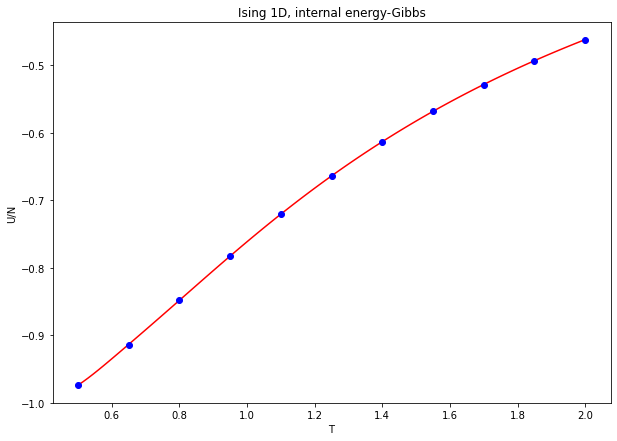

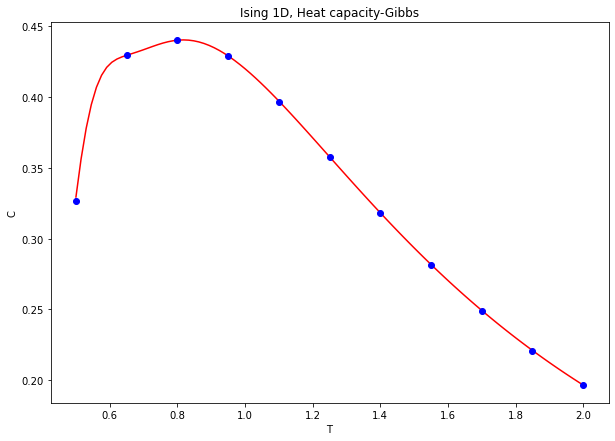

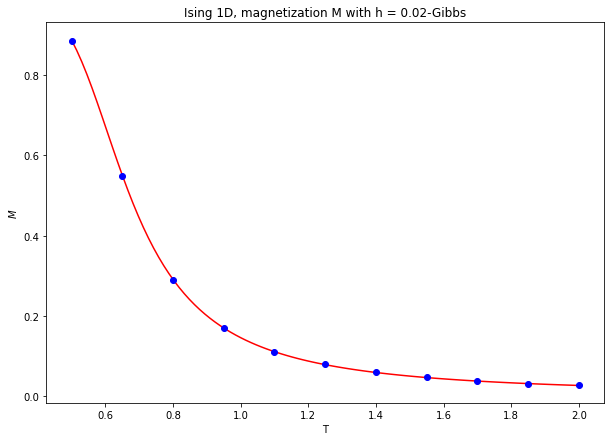

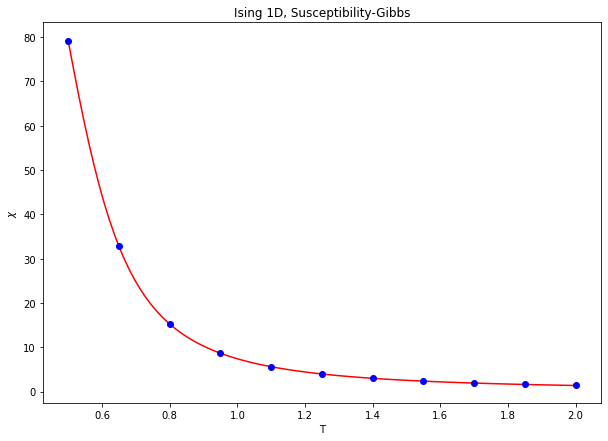

In [41]:
#GIBBS

import numpy as np
import matplotlib.pyplot as plt


points=100
T = np.linspace(0.5,2.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )

#ENERGIA INTERNA
x,f,error=np.loadtxt("output.FINAL_0_Gibbs", usecols=(0,1,2), unpack='true')
plt.figure(figsize=(10,7))
plt.plot(T, e,color='red')
plt.errorbar(x,f,error, fmt='o', color='blue')
plt.title('Ising 1D, internal energy-Gibbs')
plt.xlabel('T')
plt.ylabel('U/N')
plt.show()

#CAPACITA TERMICA
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
plt.figure(figsize=(10,7))
x,f,error=np.loadtxt("output.FINAL_0_Gibbs", usecols=(0,3,4), unpack='true')
plt.errorbar(x,f,error, fmt='o', color='blue')
plt.plot(T, heat,color='red')
plt.title('Ising 1D, Heat capacity-Gibbs')
plt.xlabel('T')
plt.ylabel('C')
plt.show()

#MAGNETIZZAZIONE
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
plt.figure(figsize=(10,7))
x,f,error=np.loadtxt("output.FINAL_0_02_Gibbs", usecols=(0,5,6), unpack='true')
plt.errorbar(x,f,error, fmt='o', color='blue')
plt.plot(T, M,color='red')
plt.title('Ising 1D, magnetization M with h = 0.02-Gibbs')
plt.xlabel('T')
plt.ylabel('$M$')
plt.show()

#SUSCETTIBILITA
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
plt.figure(figsize=(10,7))
x,f,error=np.loadtxt("output.FINAL_0_Gibbs", usecols=(0,7,8), unpack='true')
plt.errorbar(x,f,error, fmt='o', color='blue')
plt.plot(T, X,color='red')
plt.title('Ising 1D, Susceptibility-Gibbs')
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.show()

Si può notare che per entrambe le simulazioni e per ogni grandezza i valori ottenuti sono compatibili con quelli attesi